In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_pickle('/work/NLP_Project/GenreFromLyricsShared/cleaned_df/df_cleaned_engl.pkl')

In [3]:
df

,title,tag,artist,year,lyrics,id,language
0,Killa Cam,rap,Cam'ron,2004,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en
1,Can I Live,rap,JAY-Z,1996,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause I'm eatin\nAnd these bastards fien...,4,en
3,Down and Out,rap,Cam'ron,2004,[Produced by Kanye West and Brian Miller]\n\n[...,5,en
4,Fly In,rap,Lil Wayne,2005,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en
...,...,...,...,...,...,...,...
5913405,FÖRBI,pop,Noah Wiking & Hugo Nordquist,2022,TBD,7882844,en
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en
5913408,JokAir - Big Drip ft. ARÓN LineMa Traducción ...,rap,Genius Traducciones al Espaol,2022,[Instrumental],7882847,en
5913409,New Number,country,Alana Springsteen,2022,"[Verse 1]\nYou need a new number, one that ain...",7882848,en


In [3]:
df = df.drop(['language'], axis=1)

In [4]:
#calculate number of words in lyrics
df['lyrics_word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))

In [5]:
#filtering df by length of lyrics and timeframe
#there are many lengthy lyric counts - we do not want these as many are spoken word or authored content. many songs with less 
df = df[(df['lyrics_word_count'] < 5000)]
df = df[(df['lyrics_word_count'] > 25)]
df = df[(df['year'] >= 1960) & (df['year'] <= 2023)]

In [6]:


#initial preprocessing steps
#step 1 - remove [] and anything inbetween, \n and so on

df['lyrics'] = df['lyrics'].str.replace('\n', ' ') 
df['lyrics'] = df['lyrics'].str.replace('\[.*?\]', '', regex=True) 
punctuation = string.punctuation  # This string contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# Remove punctuation from the lyrics
df['lyrics'] = df['lyrics'].str.replace('['+punctuation+']', '', regex=True)


In [7]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,rap,Cam'ron,2004,Killa Cam Killa Cam Cam Killa Cam Killa Cam K...,1,762
1,Can I Live,rap,JAY-Z,1996,Yeah hah yeah RocAFella We invite you to so...,3,548
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause Im eatin And these bastards fiend ...,4,574
3,Down and Out,rap,Cam'ron,2004,Ugh Killa Baby Kanye this that 1970s Heron ...,5,760
4,Fly In,rap,Lil Wayne,2005,So they ask me Young boy What you gon do the ...,6,432
...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,Everything is alright now Oh yes baby Everythi...,7882838,63
5913401,White Lies,pop,ElementD,2019,Half truth and half you Didnt we say were thr...,7882840,171
5913403,Ocean,pop,Effemar,2022,Dance for me now Keeping yourself moving Your...,7882842,166
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,Here our purpose feels alive We are more than...,7882845,184


In [8]:
df.sample(5)

,title,tag,artist,year,lyrics,id,lyrics_word_count
1233602,Look At Me I’m You,pop,Blossom Toes,1967,Look at me Im you look at me Im you Well well...,1552256,255
4101982,Maljaande,pop,Tristan,2019,I know we are safe here But somehow I choose ...,5595453,222
4877303,Cheeseboy,rap,Adam Ford (US),2021,It aint being easy being cheesy I’m like pl...,6571833,336
233953,Lames in the Game,rap,Hell Rell,2013,Intro The business is entertainment and what e...,278078,676
2938855,Whirlpool,rock,My Dad Is Dead,1989,Shes got fists the size of the state of New Yo...,4138694,208


In [10]:
avg_lyric_length_by_genre = df.groupby('tag')['lyrics_word_count'].mean()
avg_lyric_length_by_genre

tag
country    231.952400
pop        228.394698
rap        432.536710
rb         307.385275
rock       203.557676
Name: lyrics_word_count, dtype: float64

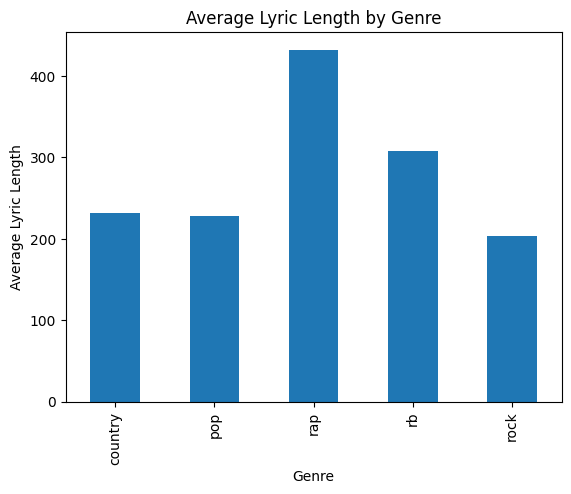

In [63]:
avg_lyric_length_by_genre.plot(kind='bar')
plt.title('Average Lyric Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Lyric Length')
plt.show()


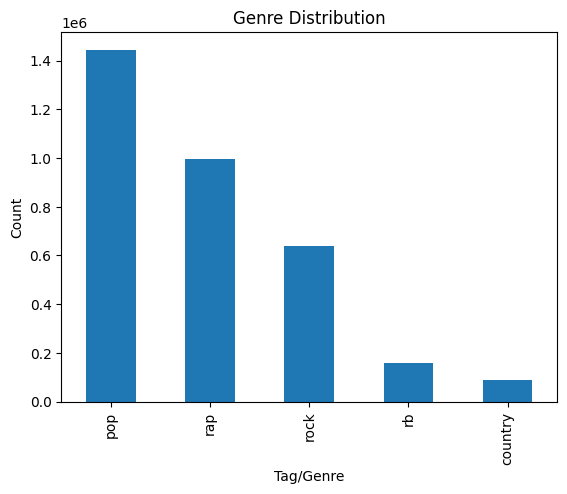

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df['tag'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Tag/Genre')
plt.ylabel('Count')
plt.show()

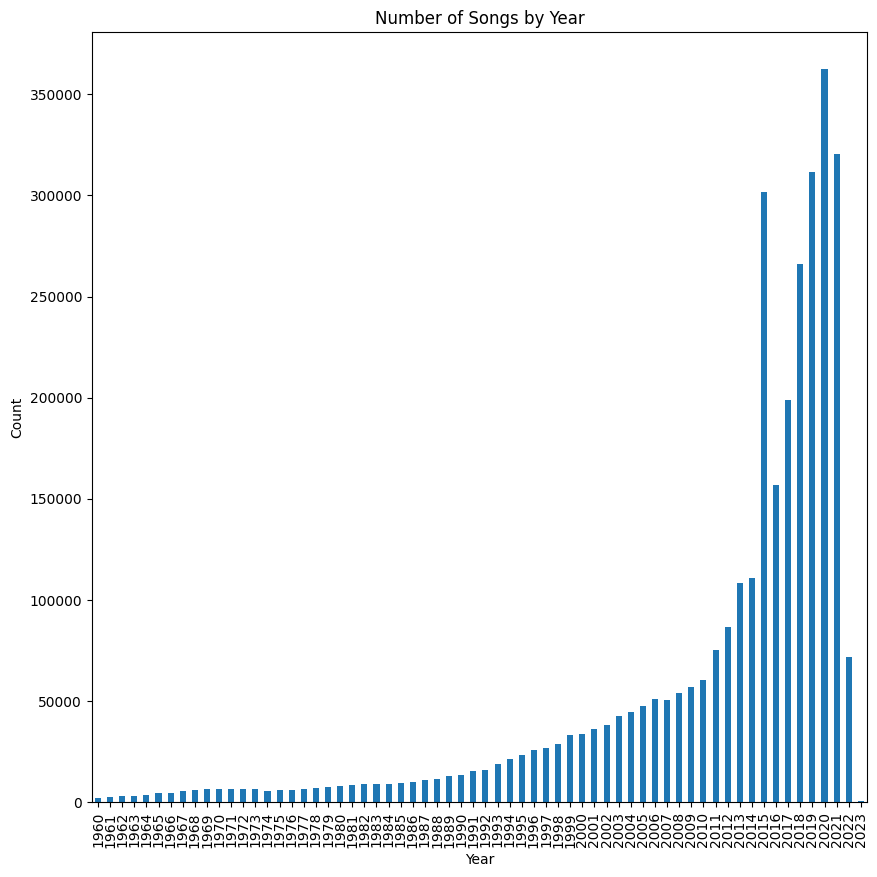

In [51]:
plt.figure(figsize=(10, 10))  # Width=15, height=10
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


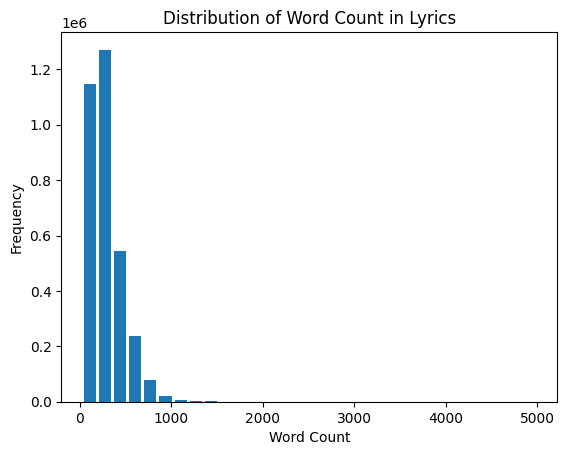

In [50]:

df['lyrics_word_count'].plot(kind='hist', rwidth=0.8, bins=30)
plt.title('Distribution of Word Count in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()



In [11]:
#preprocessing part 2

#lowercase everything
df['lyrics'] = df['lyrics'].str.lower()

#remove the words 'chorus' and 'verse'
df['lyrics'] = df['lyrics'].str.replace('chorus', '')
df['lyrics'] = df['lyrics'].str.replace('verse', '')



In [19]:
#preprocessing part 3 

#remove stopwords 


nltk.download('stopwords')  # download the stopwords from NLTK

stop = stopwords.words('english')

df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df.to_pickle('stopwords_removed.pkl')

In [22]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,rap,Cam'ron,2004,killa cam killa cam cam killa cam killa cam ki...,1,762
1,Can I Live,rap,JAY-Z,1996,yeah hah yeah rocafella invite somethin epic k...,3,548
2,Forgive Me Father,rap,Fabolous,2003,maybe cause im eatin bastards fiend grub carry...,4,574
3,Down and Out,rap,Cam'ron,2004,ugh killa baby kanye 1970s heron flow huh yeah...,5,760
4,Fly In,rap,Lil Wayne,2005,ask young boy gon second time around gon come ...,6,432
...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,everything alright oh yes baby everything alri...,7882838,63
5913401,White Lies,pop,ElementD,2019,half truth half didnt say got white lies show ...,7882840,171
5913403,Ocean,pop,Effemar,2022,dance keeping moving youre boring keep feeling...,7882842,166
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,purpose feels alive memory waking hazy skies c...,7882845,184


In [25]:
#preprocessing part 4

#tokenize lyrics 
nltk.download('punkt')  # download the necessary resources for tokenization

df['lyrics'] = df['lyrics'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
df.to_pickle('tokenized.pkl')

In [28]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,rap,Cam'ron,2004,"[killa, cam, killa, cam, cam, killa, cam, kill...",1,762
1,Can I Live,rap,JAY-Z,1996,"[yeah, hah, yeah, rocafella, invite, somethin,...",3,548
2,Forgive Me Father,rap,Fabolous,2003,"[maybe, cause, im, eatin, bastards, fiend, gru...",4,574
3,Down and Out,rap,Cam'ron,2004,"[ugh, killa, baby, kanye, 1970s, heron, flow, ...",5,760
4,Fly In,rap,Lil Wayne,2005,"[ask, young, boy, gon, second, time, around, g...",6,432
...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,"[everything, alright, oh, yes, baby, everythin...",7882838,63
5913401,White Lies,pop,ElementD,2019,"[half, truth, half, didnt, say, got, white, li...",7882840,171
5913403,Ocean,pop,Effemar,2022,"[dance, keeping, moving, youre, boring, keep, ...",7882842,166
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,"[purpose, feels, alive, memory, waking, hazy, ...",7882845,184


In [29]:
#preprocessing part 5

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

df['stemmed_lyrics'] = df['lyrics'].apply(lambda x: [stemmer.stem(word) for word in x])


In [30]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count,stemmed_lyrics
0,Killa Cam,rap,Cam'ron,2004,"[killa, cam, killa, cam, cam, killa, cam, kill...",1,762,"[killa, cam, killa, cam, cam, killa, cam, kill..."
1,Can I Live,rap,JAY-Z,1996,"[yeah, hah, yeah, rocafella, invite, somethin,...",3,548,"[yeah, hah, yeah, rocafella, invit, somethin, ..."
2,Forgive Me Father,rap,Fabolous,2003,"[maybe, cause, im, eatin, bastards, fiend, gru...",4,574,"[mayb, caus, im, eatin, bastard, fiend, grub, ..."
3,Down and Out,rap,Cam'ron,2004,"[ugh, killa, baby, kanye, 1970s, heron, flow, ...",5,760,"[ugh, killa, babi, kany, 1970s, heron, flow, h..."
4,Fly In,rap,Lil Wayne,2005,"[ask, young, boy, gon, second, time, around, g...",6,432,"[ask, young, boy, gon, second, time, around, g..."
...,...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,"[everything, alright, oh, yes, baby, everythin...",7882838,63,"[everyth, alright, oh, yes, babi, everyth, alr..."
5913401,White Lies,pop,ElementD,2019,"[half, truth, half, didnt, say, got, white, li...",7882840,171,"[half, truth, half, didnt, say, got, white, li..."
5913403,Ocean,pop,Effemar,2022,"[dance, keeping, moving, youre, boring, keep, ...",7882842,166,"[danc, keep, move, your, bore, keep, feel, oce..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,"[purpose, feels, alive, memory, waking, hazy, ...",7882845,184,"[purpos, feel, aliv, memori, wake, hazi, sky, ..."


In [31]:
df.to_pickle('stemmed.pkl')

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')  # download WordNet

lemmatizer = WordNetLemmatizer()

df['lemmatized_lyrics'] = df['lyrics'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...


In [33]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count,stemmed_lyrics,lemmatized_lyrics
0,Killa Cam,rap,Cam'ron,2004,"[killa, cam, killa, cam, cam, killa, cam, kill...",1,762,"[killa, cam, killa, cam, cam, killa, cam, kill...","[killa, cam, killa, cam, cam, killa, cam, kill..."
1,Can I Live,rap,JAY-Z,1996,"[yeah, hah, yeah, rocafella, invite, somethin,...",3,548,"[yeah, hah, yeah, rocafella, invit, somethin, ...","[yeah, hah, yeah, rocafella, invite, somethin,..."
2,Forgive Me Father,rap,Fabolous,2003,"[maybe, cause, im, eatin, bastards, fiend, gru...",4,574,"[mayb, caus, im, eatin, bastard, fiend, grub, ...","[maybe, cause, im, eatin, bastard, fiend, grub..."
3,Down and Out,rap,Cam'ron,2004,"[ugh, killa, baby, kanye, 1970s, heron, flow, ...",5,760,"[ugh, killa, babi, kany, 1970s, heron, flow, h...","[ugh, killa, baby, kanye, 1970s, heron, flow, ..."
4,Fly In,rap,Lil Wayne,2005,"[ask, young, boy, gon, second, time, around, g...",6,432,"[ask, young, boy, gon, second, time, around, g...","[ask, young, boy, gon, second, time, around, g..."
...,...,...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,"[everything, alright, oh, yes, baby, everythin...",7882838,63,"[everyth, alright, oh, yes, babi, everyth, alr...","[everything, alright, oh, yes, baby, everythin..."
5913401,White Lies,pop,ElementD,2019,"[half, truth, half, didnt, say, got, white, li...",7882840,171,"[half, truth, half, didnt, say, got, white, li...","[half, truth, half, didnt, say, got, white, li..."
5913403,Ocean,pop,Effemar,2022,"[dance, keeping, moving, youre, boring, keep, ...",7882842,166,"[danc, keep, move, your, bore, keep, feel, oce...","[dance, keeping, moving, youre, boring, keep, ..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,"[purpose, feels, alive, memory, waking, hazy, ...",7882845,184,"[purpos, feel, aliv, memori, wake, hazi, sky, ...","[purpose, feel, alive, memory, waking, hazy, s..."


In [1]:
df.to_pickle('lemmatized.pkl')

NameError: name 'df' is not defined